# II. Data explore

## Import các thư viện cần thiết

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re
import seaborn as sns

## Load dataset đã tạo ở phần trước

In [3]:
raw_df = pd.read_csv("../Data/raw/raw_data.csv")

In ra 5 dòng đầu tiên của dataset

In [4]:
raw_df.head()

,Company,Year,EPS,Earnings,Revenue,Marketcap,Total Debts,Net Assets,Total Assets,Cash on hand,Country,Share price,Categories
0,Apple,2023,$6.16,$114.30 B,$383.28 B,$3.043 T,$111.08 B,$62.14 B,$352.58 B,$61.55 B,USA,$195.71,"👨‍💻 Software, 👩‍💻 Tech, 🔌 Electronics, 🇺🇸 Dow ..."
1,Apple,2022,$5.92,$113.96 B,$387.53 B,$2.066 T,$120.06 B,$50.67 B,$352.75 B,$48.30 B,USA,$195.71,"👨‍💻 Software, 👩‍💻 Tech, 🔌 Electronics, 🇺🇸 Dow ..."
2,Apple,2021,$6.08,$116.90 B,$378.32 B,$2.901 T,$124.71 B,$63.09 B,$351.00 B,$62.63 B,USA,$195.71,"👨‍💻 Software, 👩‍💻 Tech, 🔌 Electronics, 🇺🇸 Dow ..."
3,Apple,2020,$3.74,$74.25 B,$294.13 B,$2.255 T,$112.43 B,$65.33 B,$323.88 B,$90.94 B,USA,$195.71,"👨‍💻 Software, 👩‍💻 Tech, 🔌 Electronics, 🇺🇸 Dow ..."
4,Apple,2019,$3.19,$66.15 B,$267.68 B,$1.287 T,$108.04 B,$90.48 B,$338.51 B,$100.55 B,USA,$195.71,"👨‍💻 Software, 👩‍💻 Tech, 🔌 Electronics, 🇺🇸 Dow ..."


## Số dòng và số cột

In [5]:
n_rows, n_cols = raw_df.shape
print(f"Dataset có {n_rows} dòng và {n_cols} cột")

Dataset có 69460 dòng và 13 cột


## Ý nghĩa của các dòng

1 dòng trong dataset là một observation ghi nhận các thông tin của các công ty theo từng năm. Các thông tin của mỗi dòng cung cấp cho ta cái nhìn tổng quan về quy mô, tình trạng hoạt động... của các công ty

## Kiểm tra sự trùng lắp giữa các dòng

In [6]:
n_dups = raw_df.duplicated().sum()

if n_dups:
    print(f"Có {n_dups} dòng trùng nhau")
else:
    print("Không có dòng bị trùng")

Có 23506 dòng trùng nhau


Xóa các dòng bị trùng lắp

In [7]:
raw_df.drop_duplicates(inplace=True)

# Kiểm tra lại sau khi xóa các dòng bị trùng
if raw_df.duplicated().sum():
    print(f"Có {raw_df.duplicated().sum()} dòng trùng nhau")
else:
    print("Không có dòng bị trùng")

Không có dòng bị trùng


In [8]:
raw_df.sample(5)

,Company,Year,EPS,Earnings,Revenue,Marketcap,Total Debts,Net Assets,Total Assets,Cash on hand,Country,Share price,Categories
35729,Bayer,2013,$5.08,$6.71 B,$53.29 B,$116.42 B,$9.94 B,$28.73 B,$70.86 B,$2.48 B,Germany,$34.42,"💊 Pharmaceuticals, 🧪 Chemicals, 🇩🇪 DAX, 🧬 Biotech"
35428,Biogen,2015,$15.37,$4.76 B,$10.76 B,$66.96 B,$6.52 B,$9.37 B,$19.50 B,$3.42 B,USA,$239.29,"💊 Pharmaceuticals, 🧬 Biotech"
68691,Aselsan,2010,$0.04547,$0.19 B,$0.77 B,$1.24 B,$91.84 M,$0.54 B,$1.77 B,$0.39 B,Turkey,$1.60,🔫 Defense contractors
5509,Ferrari,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italy,$366.75,"🚗 Automakers, 🏭 Manufacturing"
61338,GitLab,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,$59.20,"👨‍💻 Software, 👩‍💻 Tech"


In [9]:
# ô xóa
sorted_data = raw_df.groupby('Company').size().sort_values(ascending=False)
sorted_data

Company
(HLBank) Hong Leong Bank          23
Oriental Land                     23
PMetal (Press Metal Aluminium)    23
PKO Bank Polski                   23
PKN Orlen                         23
                                  ..
Ericsson                          23
Equity Residential                23
Equity LifeStyle Properties       23
Equitable Holdings                23
“K” Line                          23
Length: 1998, dtype: int64

## Ý nghĩa của các cột

- `Company`: tên công ty

- `Year`: năm ghi nhận

- `EPS`: lợi nhuận / cổ phần

- `Earnings`: lợi nhuận

- `Revenue`: doanh thu

- `Marketcap`: vốn hoá thị trường

- `Total Debts`: tổng nợ

- `Net Assets`: tài sản ròng

- `Total Assets`: tổng tài sản

- `Cash on hand`: tiền mặt có sẵn

- `Country`: quốc giá

- `Share price`: giá cổ phiếu

- `Categories`: danh mục công ty

## Kiểu dữ liệu mỗi cột

In [10]:
dtypes = raw_df.dtypes
dtypes

Company         object
Year             int64
EPS             object
Earnings        object
Revenue         object
Marketcap       object
Total Debts     object
Net Assets      object
Total Assets    object
Cash on hand    object
Country         object
Share price     object
Categories      object
dtype: object

Kiểu dữ liệu của `Year` là `int64`. Tuy nhiên, ta nhận thấy nó nên thuộc `Categorical` thì hợp lý hơn `Numerical` nên ta sẽ đổi sang kiểu `object`

In [11]:
raw_df["Year"] = raw_df["Year"].astype("object")

## Chuẩn hoá dữ liệu

EPS, Earnings, Revenue, Marketcap, Total Debts, Net Assets, Total Assets, Cash on hand, Share price: Các cột này chứa dữ liệu số nhưng có kèm theo ký hiệu đơn vị như "$", "B" (tượng trưng cho tỷ đô la). Do đó, ta cần loại bỏ các ký tự không cần thiết và chuyển đổi sang kiểu float.  
    Trong cột, có các kí hiệu `T`, `B`, `M` tượng trưng cho ` nghìn tỷ `, `  tỷ ` ,  ` triệu ` . Ta sẽ chuyển hết về `B`.

In [12]:
# df = raw_df.copy()

cols_to_convert = ['EPS', 'Earnings', 'Revenue', 'Marketcap', 'Total Debts', 'Net Assets', 'Total Assets', 'Cash on hand', 'Share price']

conversion_factors = {'M': 1e-3, 'T': 1e3}

for col in cols_to_convert:
    raw_df[col] = raw_df[col].replace({'\$': '', ',': ''}, regex=True)
    last_char = raw_df[col].str[-1]
    
    for idx, c in last_char.items():
        if c in ['M', 'T']:
            raw_df.at[idx, col] = pd.to_numeric(raw_df.at[idx, col][:-1], errors='coerce') * conversion_factors.get(c)
        elif c == 'B':
            raw_df.at[idx, col] = pd.to_numeric(raw_df.at[idx, col][:-1], errors='coerce')
        else:
            raw_df.at[idx, col] = pd.to_numeric(raw_df.at[idx, col], errors='coerce')

    
raw_df.sample(5)

,Company,Year,EPS,Earnings,Revenue,Marketcap,Total Debts,Net Assets,Total Assets,Cash on hand,Country,Share price,Categories
38341,FICO,2023,16.7,0.55,1.51,28.03,1.88,-0.69,1.57,0.13,USA,1134,"👨‍💻 Software, 👩‍💻 Tech"
4878,BMW,2021,21.95,19.05,129.45,65.11,94.82,85.08,259.93,24.69,Germany,108.91,"🚗 Automakers, 🇩🇪 DAX, 🏭 Manufacturing"
69030,Israel Discount Bank,2016,2.21,0.45,1.98,1.9,2.23,3.93,57.78,7.8,Israel,58.0,NaN
56057,Surgutneftegas,2017,0.32,13.58,15.83,21.07,NaN,60.51,64.2,1.08,Russia,0.3,"🛢 Oil&Gas, ⚡ Energy"
53826,Turkish Airlines,2017,0.03979,0.24,10.96,5.73,9.01,5.31,18.08,2.07,Turkey,8.79,"✈️ Airlines, 🌴 Travel, 🚚 Transportation"


In [13]:
raw_df[raw_df['Company']== 'Apple']

,Company,Year,EPS,Earnings,Revenue,Marketcap,Total Debts,Net Assets,Total Assets,Cash on hand,Country,Share price,Categories
0,Apple,2023,6.16,114.3,383.28,3043.0,111.08,62.14,352.58,61.55,USA,195.71,"👨‍💻 Software, 👩‍💻 Tech, 🔌 Electronics, 🇺🇸 Dow ..."
1,Apple,2022,5.92,113.96,387.53,2066.0,120.06,50.67,352.75,48.3,USA,195.71,"👨‍💻 Software, 👩‍💻 Tech, 🔌 Electronics, 🇺🇸 Dow ..."
2,Apple,2021,6.08,116.9,378.32,2901.0,124.71,63.09,351.0,62.63,USA,195.71,"👨‍💻 Software, 👩‍💻 Tech, 🔌 Electronics, 🇺🇸 Dow ..."
3,Apple,2020,3.74,74.25,294.13,2255.0,112.43,65.33,323.88,90.94,USA,195.71,"👨‍💻 Software, 👩‍💻 Tech, 🔌 Electronics, 🇺🇸 Dow ..."
4,Apple,2019,3.19,66.15,267.68,1287.0,108.04,90.48,338.51,100.55,USA,195.71,"👨‍💻 Software, 👩‍💻 Tech, 🔌 Electronics, 🇺🇸 Dow ..."
5,Apple,2018,3.07,67.97,261.61,746.07,114.48,107.14,365.72,66.3,USA,195.71,"👨‍💻 Software, 👩‍💻 Tech, 🔌 Electronics, 🇺🇸 Dow ..."
6,Apple,2017,2.45,64.25,239.17,860.88,115.68,134.04,375.31,74.18,USA,195.71,"👨‍💻 Software, 👩‍💻 Tech, 🔌 Electronics, 🇺🇸 Dow ..."
7,Apple,2016,2.1,59.21,218.11,608.96,87.03,128.24,321.68,67.15,USA,195.71,"👨‍💻 Software, 👩‍💻 Tech, 🔌 Electronics, 🇺🇸 Dow ..."
8,Apple,2015,2.37,71.15,234.98,583.61,64.46,119.35,290.47,41.6,USA,195.71,"👨‍💻 Software, 👩‍💻 Tech, 🔌 Electronics, 🇺🇸 Dow ..."
9,Apple,2014,1.87,59.28,199.8,643.12,35.29,111.54,231.83,25.07,USA,195.71,"👨‍💻 Software, 👩‍💻 Tech, 🔌 Electronics, 🇺🇸 Dow ..."


Ta cũng cần thay đổi lại tên các cột `EPS`, `Earnings`, `Revenue`, `Marketcap`, `Total Debts`, `Net Assets`, `Total Assets`, `Cash on hand`, `Share price` để dễ thấy ý nghĩa của cột.

In [14]:
new_column_names = {
    'EPS': 'EPS ($)',
    'Earnings': 'Earnings ($B)',
    'Revenue': 'Revenue ($B)',
    'Marketcap': 'Marketcap ($B)',
    'Total Debts': 'Total Debts ($B)',
    'Net Assets': 'Net Assets ($B)',
    'Total Assets': 'Total Assets ($B)',
    'Cash on hand': 'Cash on hand ($B)',
    'Share price': 'Share price ($)'
}

# Đổi tên các cột
raw_df = raw_df.rename(columns=new_column_names)

Bây giờ, cột `Categories` chứa các icon không cần thiết và gây nhiều khó khăn cho nên ta sẽ xoá các icon này

Hàm loại bỏ emoji

In [15]:
def remove_emojis(input_string):
    # Create a regex pattern to match a broader range of special characters
    special_char_pattern = re.compile("[^\w\s,]\s?", flags=re.UNICODE)

    # Use re.sub to replace the matched characters with an empty string
    result_string = special_char_pattern.sub('', input_string)

    return result_string

Xoá các icon trong `Categories`

In [16]:
raw_df["Categories"] = raw_df["Categories"].apply(lambda x: x if pd.isna(x) else remove_emojis(x))

In [17]:
raw_df["Categories"][22:24]

22    Software, Tech, Electronics, Dow jones, Tech H...
23           Software, Tech, Video games, Dow jones, AI
Name: Categories, dtype: object

Đã xoá thành công emoji, tuy nhiên vẫn còn các khoảng trắng dư thừa

Viết hàm chuẩn hoá để xoá bỏ các khoảng trắng dư thừa

In [18]:
def normalize(x): # x is a row
    if pd.isna(x):
        return x
    else:
        x = x.strip()
        x = x.split(", ")
        x = [cate.strip() for cate in  x]
        x = ", ".join(x)
        return x



raw_df["Categories"] = raw_df["Categories"].apply(normalize)

## Kiểm tra missing-values của các cột

In [19]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45954 entries, 0 to 69459
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            45954 non-null  object
 1   Year               45954 non-null  object
 2   EPS ($)            32237 non-null  object
 3   Earnings ($B)      32371 non-null  object
 4   Revenue ($B)       32503 non-null  object
 5   Marketcap ($B)     34364 non-null  object
 6   Total Debts ($B)   34199 non-null  object
 7   Net Assets ($B)    36745 non-null  object
 8   Total Assets ($B)  36824 non-null  object
 9   Cash on hand ($B)  36043 non-null  object
 10  Country            45954 non-null  object
 11  Share price ($)    45954 non-null  object
 12  Categories         42642 non-null  object
dtypes: object(13)
memory usage: 5.9+ MB


Tính tỉ lệ missing-values của các cột

In [20]:
raw_df.apply(lambda col: 1 -col.isna().sum() / len(col))

Company              1.000000
Year                 1.000000
EPS ($)              0.701506
Earnings ($B)        0.704422
Revenue ($B)         0.707294
Marketcap ($B)       0.747791
Total Debts ($B)     0.744201
Net Assets ($B)      0.799604
Total Assets ($B)    0.801323
Cash on hand ($B)    0.784328
Country              1.000000
Share price ($)      1.000000
Categories           0.927928
dtype: float64

- Nhìn chung, có nhiều cột có missing-values khá nhiều

- Đối với các observation thiếu đi `Categories` thì ta sẽ drop. Lí do: công ty không có thông tin về danh mục thì khó cho việc phân tích.

- Đối với các cột còn lại (đa số là `Numerical`), ta sẽ thay bằng giá trị `median` tương ứng dựa theo công ty đó.

## Xử lý missing-values cho các cột `Categorical`

Tiến hành bỏ các dòng missing-values ở `Categories`

In [21]:
raw_df.dropna(subset=["Categories"], inplace=True)


Kiểm tra lại số lượng missing-values ở cột `Categories`

In [22]:
print(f'Số lượng missing-values: {raw_df["Categories"].isna().sum()}')

Số lượng missing-values: 0


Xem lại shape

In [23]:
raw_df.shape

(42642, 13)

## Xử lý missing values cho các cột `Numerical`

In [24]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42642 entries, 0 to 69459
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            42642 non-null  object
 1   Year               42642 non-null  object
 2   EPS ($)            29863 non-null  object
 3   Earnings ($B)      30014 non-null  object
 4   Revenue ($B)       30136 non-null  object
 5   Marketcap ($B)     31765 non-null  object
 6   Total Debts ($B)   31705 non-null  object
 7   Net Assets ($B)    34028 non-null  object
 8   Total Assets ($B)  34105 non-null  object
 9   Cash on hand ($B)  33375 non-null  object
 10  Country            42642 non-null  object
 11  Share price ($)    42642 non-null  object
 12  Categories         42642 non-null  object
dtypes: object(13)
memory usage: 4.6+ MB


Trong các cột `Numerical`, cột tồn tại missing values bao gồm:

- `EPS ($)`           

- `Earnings ($B)`       

- `Revenue ($B)`      

- `Marketcap ($B)`     

- `Total Debts ($B)`   

- `Net Assets ($B)`    

- `Total Assets ($B)`  

- `Cash on hand ($B)` 


In [25]:
num_missing_cols = ["EPS ($)", "Earnings ($B)", "Revenue ($B)", "Marketcap ($B)", "Total Debts ($B)", "Net Assets ($B)", "Total Assets ($B)", "Cash on hand ($B)"]
num_missing_cols

['EPS ($)',
 'Earnings ($B)',
 'Revenue ($B)',
 'Marketcap ($B)',
 'Total Debts ($B)',
 'Net Assets ($B)',
 'Total Assets ($B)',
 'Cash on hand ($B)']

Phương án xử lý missing-value bằng cách replace bằng `median` hay `mean` theo cột có vẻ không hợp lý bởi vì có nhiều công ty và quy mô cũng khác nhau. Do đó nếu thay như vậy thì giảm mức độ chính xác đi rất nhiều.

Một phương án có thể đó là thay bằng giá trị `median` dựa trên từng công ty. 

Tuy nhiên, có trường hợp một `company` có một cột toàn `nan`. Do đó, ta sẽ drop luôn những `company` thuộc trường hợp này.

### Tạo DataFrame mới lưu số lượng missing-values của mỗi cột theo từng company

In [26]:
missing_counts_df = raw_df.groupby("Company")[num_missing_cols].apply(lambda company: company.isna().sum())

# Chuyển `Company` thành cột
missing_counts_df = missing_counts_df.reset_index()
missing_counts_df

,Company,EPS ($),Earnings ($B),Revenue ($B),Marketcap ($B),Total Debts ($B),Net Assets ($B),Total Assets ($B),Cash on hand ($B)
0,(HLBank) Hong Leong Bank,11,11,11,5,5,4,4,5
1,37 Interactive Entertainment,9,9,9,19,10,7,7,7
2,3M,0,0,0,0,1,1,1,1
3,3i Group,4,3,3,6,4,3,3,5
4,7-Eleven,9,9,9,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...
1849,monday.com,19,19,19,20,19,19,19,19
1850,nVent Electric,16,16,16,17,18,16,16,16
1851,Ørsted,14,14,14,16,13,13,13,13
1852,ČEZ Group,4,10,10,5,5,5,5,5


### Tạo DataFrame chứa số lượng missing values là lớn nhất trong các cột theo công ty

In [27]:
max_missing = missing_counts_df.apply(lambda row: max(row[num_missing_cols]), axis = 1)
max_missing_df = pd.concat((missing_counts_df["Company"], max_missing), axis = 1)
max_missing_df.columns = ["Company", "Max missing values"]
max_missing_df

,Company,Max missing values
0,(HLBank) Hong Leong Bank,11
1,37 Interactive Entertainment,19
2,3M,1
3,3i Group,6
4,7-Eleven,9
...,...,...
1849,monday.com,20
1850,nVent Electric,18
1851,Ørsted,16
1852,ČEZ Group,10


Do mỗi công ty, ta thu thập `23` observation tương ứng với `23` năm nên ta sẽ drop những observation nào có `Max mising values` là `23`. Bởi vì các company này tồn tại các cột không thể tính `median`

Lấy danh sách công ty cần drop

In [28]:
drop_list = max_missing_df[max_missing_df["Max missing values"] == 23]["Company"]
drop_list.head()

8               ADNOC Drilling Company
9                            ADNOC Gas
10          ADNOC Logistics & Services
37    Abu Dhabi Commercial Bank (ADCB)
38       Abu Dhabi Islamic Bank (ADIB)
Name: Company, dtype: object

In [29]:
print(f"Số lượng công ty cần drop: {len(drop_list)}")

Số lượng công ty cần drop: 52


Tiến hành drop các công ty này trong `raw_df`

In [30]:
raw_df = raw_df[~raw_df["Company"].isin(drop_list.values)]

Xem lại shape

In [31]:
raw_df.shape

(41446, 13)

Bây giờ, ta có thể tiến hành replace `nan` bằng `median` của cột theo từng công ty mà không sợ bị lỗi nữa.

Tương ứng với từng `Numerical` cột, ta sẽ tạo một dictionary với:

- Key: tên của Company

- Value: `median` tương ứng với cột dựa theo Company

In [32]:
median_dict = []

for col in num_missing_cols:
    median_dict.append(raw_df.groupby("Company")[col].median().to_dict())


Lặp qua các cột `Numerical` có missing value và tiến hành thay thế các giá trị `nan` bằng `median` tương ứng

In [33]:
for i, col in enumerate(num_missing_cols):
    raw_df[col] = raw_df.apply(lambda row: median_dict[i][row["Company"]] if pd.isna(row[col]) else row[col], axis = 1)

In [34]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41446 entries, 0 to 69459
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            41446 non-null  object 
 1   Year               41446 non-null  object 
 2   EPS ($)            41446 non-null  float64
 3   Earnings ($B)      41446 non-null  float64
 4   Revenue ($B)       41446 non-null  float64
 5   Marketcap ($B)     41446 non-null  float64
 6   Total Debts ($B)   41446 non-null  float64
 7   Net Assets ($B)    41446 non-null  float64
 8   Total Assets ($B)  41446 non-null  float64
 9   Cash on hand ($B)  41446 non-null  float64
 10  Country            41446 non-null  object 
 11  Share price ($)    41446 non-null  object 
 12  Categories         41446 non-null  object 
dtypes: float64(8), object(5)
memory usage: 4.4+ MB


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'EPS ($)'),
  Text(1, 0, 'Earnings ($B)'),
  Text(2, 0, 'Revenue ($B)'),
  Text(3, 0, 'Marketcap ($B)'),
  Text(4, 0, 'Total Debts ($B)'),
  Text(5, 0, 'Net Assets ($B)'),
  Text(6, 0, 'Total Assets ($B)'),
  Text(7, 0, 'Cash on hand ($B)'),
  Text(8, 0, 'Share price ($)')])

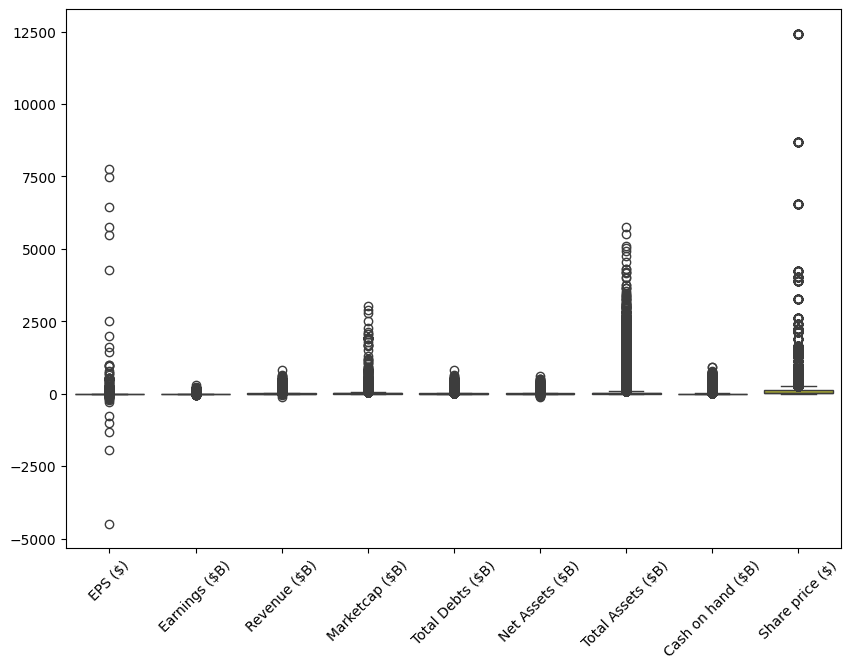

In [46]:
num_cols = ['EPS ($)', 'Earnings ($B)', 'Revenue ($B)',
       'Marketcap ($B)', 'Total Debts ($B)', 'Net Assets ($B)',
       'Total Assets ($B)', 'Cash on hand ($B)', 'Share price ($)']

plt.figure(figsize=(10, 7))
sns.boxplot(data= raw_df[num_cols])
plt.xticks(rotation=45)

**Nhận xét**

- Các cột đều có rất nhiều Outliers

- Tuy nhiên đây là Data lấy từ trong thực tế nên có nhiều Outliers là đương nhiên

- Data này là có thật nên không thể drop được

## Phân bố của các cột `Categorical`

Các cột bao gồm:
- `Company`

- `Year`

- `Country`

- `Categories`

Xem phân bố của các cột có giá trị đơn lẻ

In [36]:
single_cat_cols = ["Company", "Year", "Country"]
single_dist = raw_df[single_cat_cols].agg([
    lambda x: x.nunique(),
    lambda x: x.value_counts().to_dict()
])
single_dist.index = ["count", "distribution"]
single_dist

,Company,Year,Country
count,1802,23,49
distribution,"{'Apple': 23, 'The Mosaic Company': 23, 'BDO U...","{2023: 1802, 2011: 1802, 2002: 1802, 2003: 180...","{'USA': 15042, 'Japan': 3151, 'China': 3082, '..."


Xem phân bố của các cột có thể có nhiều giá trị

In [37]:
multiple_cat_cols = ["Categories"]


multiple_dist = raw_df[multiple_cat_cols].agg([
    lambda x: x.str.split(", ").explode().nunique(),
    lambda x: x.str.split(", ").explode().value_counts().to_dict()],
    )
multiple_dist.index = ["count", "distribution"]
multiple_dist

,Categories
count,132
distribution,"{'Financial services': 6187, 'Tech': 5359, 'En..."


## Phân bố của các cột `Numerical`

Danh sách các cột `Numerical`

In [38]:
numeric_cols = ['EPS ($)', 'Earnings ($B)', 'Revenue ($B)','Marketcap ($B)', 'Total Debts ($B)', 'Net Assets ($B)','Total Assets ($B)', 'Cash on hand ($B)', 'Share price ($)',]

Gọi `describe()` để quan sát dữ liệu

In [39]:
raw_df[numeric_cols].describe()

,EPS ($),Earnings ($B),Revenue ($B),Marketcap ($B),Total Debts ($B),Net Assets ($B),Total Assets ($B),Cash on hand ($B)
count,41446.000000,41446.000000,41446.000000,41446.000000,41446.000000,41446.000000,41446.000000,41446.000000
mean,3.819672,2.119273,16.978580,26.895598,11.305330,11.738960,73.564609,8.454082
std,84.666253,7.041591,35.636597,76.989778,33.847036,25.841681,260.327791,38.858210
min,-4486.000000,-59.280000,-108.230000,0.000000,-0.022720,-99.760000,0.000000,0.000000
25%,0.160000,0.210000,1.900000,5.830000,0.539750,1.280000,3.442500,0.260000
50%,0.950000,0.760000,5.850000,11.780000,2.485000,4.240000,11.950000,0.990000
75%,2.690000,2.080000,16.207500,25.360000,8.010000,11.270000,38.080000,3.530000
max,7742.000000,307.360000,817.510000,3043.000000,824.140000,602.460000,5743.000000,933.590000


**Nhận xét**


Dựa vào các giá trị `min` và `max`, ta không nhận thấy giá trị nào bất thường

## Lưu preprocessed data

In [40]:
raw_df.to_csv("../Data/preprocessed/cleaned_dataset.csv", index=False)